# Sine RNN

Compare effects of gates in ability to delay a sine-wave.

In [1]:
from math import sin
import matplotlib.pyplot as plt
import numpy as np

## Sine

In [47]:
wave = []
for x in range(5000):
    a = sin(x/100)
    wave.append(np.tanh(a))

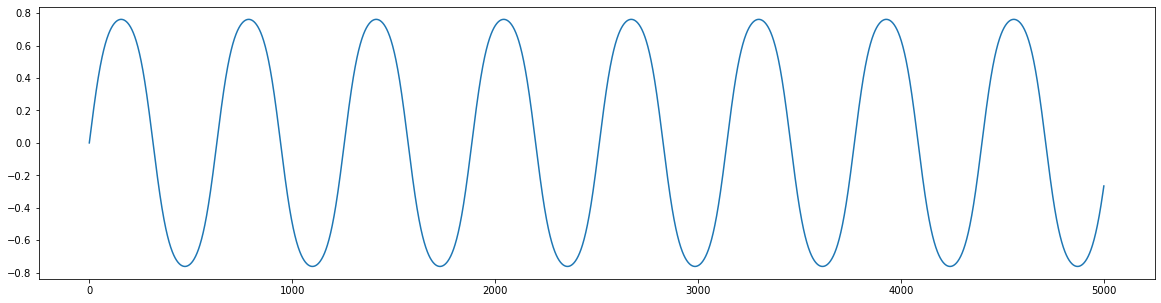

In [48]:
plt.figure(figsize=(20,5))
plt.plot(wave)
plt.show()
plt.close()

## Update gate

In [49]:
class UpdateGate:
    def __init__(self, u):
        self.hx = 0
        assert 0 <= u <= 1
        self.u = u
    
    def __call__(self, inp):
        self.hx = np.tanh(self.u * self.hx + (1-self.u) * inp)
        return self.hx

In [50]:
def create_u_wave(delay, scale=False):
    u = UpdateGate(delay)
    u_wave = []
    for w in wave:
        u_wave.append(u(w))
    
    if scale:
        u_wave = np.asarray(u_wave)
        scale = max(wave)/max(u_wave)
        u_wave *= scale
    
    plt.figure(figsize=(20,5))
    plt.title(f"U-wave of {delay}")
    plt.plot(wave, label="wave")
    plt.plot(u_wave, label="u_wave")
    plt.legend()
    plt.show()
    plt.close()

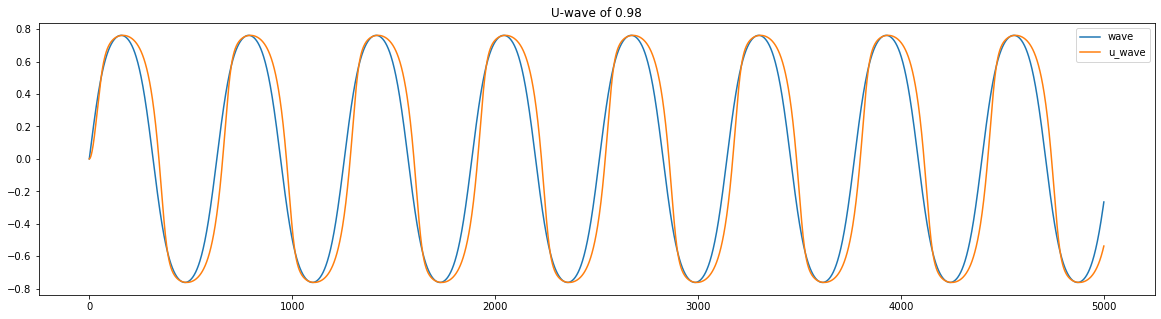

In [52]:
create_u_wave(0.98, True)

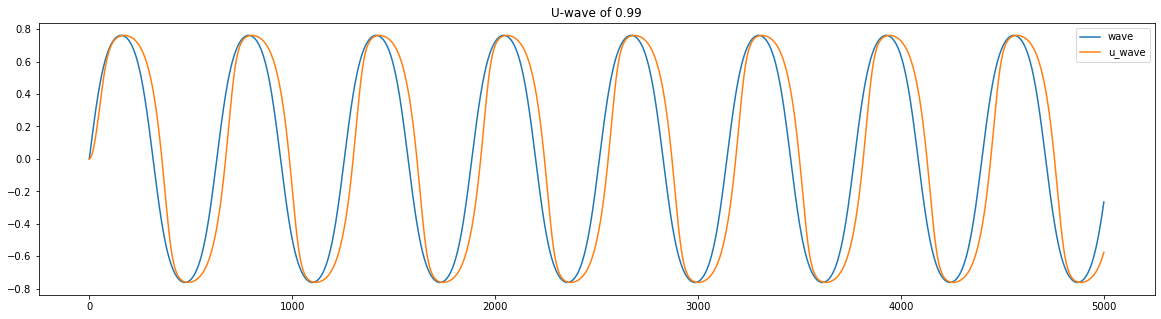

In [53]:
create_u_wave(0.99, True)

## SRU

In [54]:
class SRU:
    def __init__(self, c_xh, c_hh):
        self.hx = 0
        self.c_xh = c_xh
        self.c_hh = c_hh
    
    def __call__(self, inp):
        self.hx = np.tanh(self.c_hh * self.hx + self.c_xh * inp)
        return self.hx

In [62]:
def create_sru_wave(c_xh, c_hh, scale=False):
    sru = SRU(c_xh, c_hh)
    sru_wave = []
    for w in wave:
        sru_wave.append(sru(w))
    
    if scale:
        sru_wave = np.asarray(sru_wave)
        scale = max(wave)/max(sru_wave)
        sru_wave *= scale
    
    plt.figure(figsize=(20,5))
    plt.title(f"SRU-wave of c_xh={c_xh} and c_hh={c_hh} ")
    plt.plot(wave, label="wave")
    plt.plot(sru_wave, label="sru_wave")
    plt.legend()
    plt.show()
    plt.close()

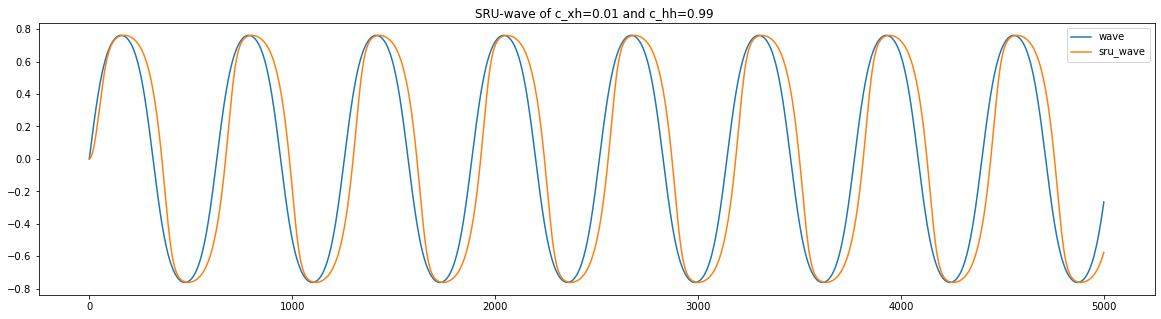

In [64]:
sru_wave = create_sru_wave(0.01, 0.99, True)

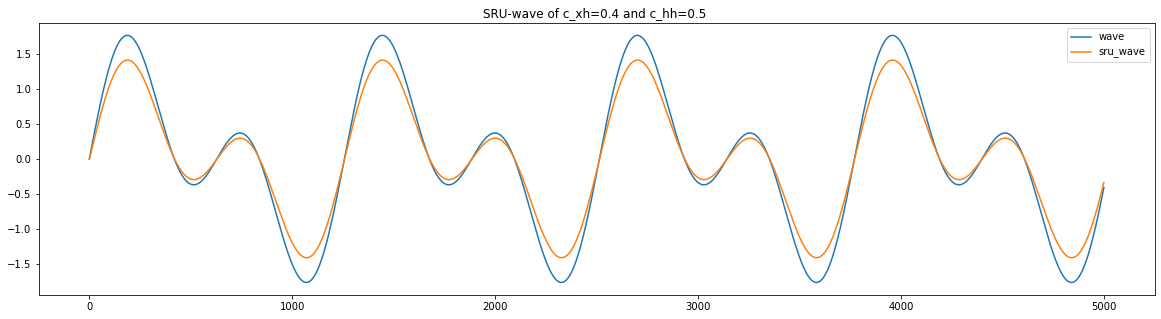

In [11]:
sru_wave = create_sru_wave(.4, .5)